# Introduction to classification with `scikit-learn`

In [1]:
from sklearn import datasets
from sklearn.linear_model import Perceptron

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

%matplotlib inline

We will revisit the Iris dataset and use the same predictors as previously, though we will keep all three types of flowers here. Those types are represented as integers with 0=Iris-Setosa, 1=Iris-Versicolor, 2=Iris-Virginica.

In [2]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

print('Class labels:', np.unique(y))

Class labels: [0 1 2]


The function `train_test_split` randomly splits the data into training and test data. The argument `test_size` indicates the proportion of the dataset that is assigned to the test data. The argument `stratify=y` means that the training and test data will have equal proportions of data of each label.

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

The `numpy` function `bincount` confirms the equal distribution of labels across the training and test data.

In [4]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


We standardize the data using scikit-learn's `StandardScaler` class. We create a `StandardScaler` object and apply two methods: `fit` computes the mean and standard deviation, and `transform` transforms the data by subtracting the mean and dividing by the standard deviation. We could have also used the method `fit_transform`, which combines the two steps.

In [5]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

## Training a perceptron via scikit-learn

We had implemented a `Perceptron` in a previous chapter. To illustrate some basic functionality of `sklearn`, we will use the Perceptron class included in that package.

Different from our own implementation, scikit-learn's `Perceptron` (and its other classifiers) can deal with classification tasks comprising more than two categories. To do so, most classifiers in  scikit-learn employ the One-versus-Rest (OvR) (also called One-versus-All, OvA) strategy, where for each category a model against all other categories combined is trained.

An exception is the Support Vector Machine, which we won't discuss in this course. It uses the One-versus-One (OvO) strategy that trains a classifier for each pair of categories and then predicts the category that "beats" the most other categories in their one-versus-one "duels".

As in our own implementation of the Perceptron, and as in all other supervised machine learning methods available in scikit-learn, we first create an instance of the learner and `fit` the model to the training data. Afterwards, we apply the method `predict` to the test data and compare the prediction to the actually observed labels.

In [6]:
ppn = Perceptron(max_iter=40, eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, max_iter=40, random_state=1)

In [7]:
y_pred = ppn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 1


A `confusion_matrix` shows the number of samples for each combination of predicted and observed category.

In [8]:
confusion_matrix(y_test, y_pred)

array([[15,  0,  0],
       [ 1, 14,  0],
       [ 0,  0, 15]], dtype=int64)

To illustrate which combinations of features predict each category, and how well the learner did both on the training and the test data, we plot the decision regions together with the individual samples.

In [9]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    edgecolor='black',
                    c='none',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

We apply this function to our data and classifier.

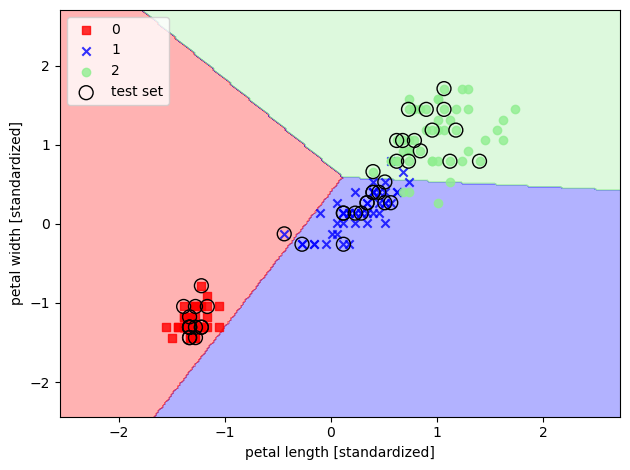

In [10]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()